In [216]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

##### EXPLORATORY DATA ANALYSIS (EDA)

In [187]:
# Load dataset
df = pd.read_csv('Bank Customer Churn Prediction.csv')
df.head(5)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [188]:
# Display a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [189]:
# Get the dimensions of the DataFrame as a tuple
df.shape

(10000, 12)

In [190]:
# Calculate the number of missing (null) values in each column of the DataFrame
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [191]:
# Count the number of duplicated rows in the DataFrame
df.duplicated().sum()

0

In [192]:
# Generate descriptive statistics for the numerical columns in the DataFrame
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [193]:
# Display the column labels of the DataFrame
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [194]:
# Drop the 'customer_id' column from the DataFrame
df.drop(['customer_id'], axis = 1, inplace = True)

# Print the dimensions of the DataFrame after dropping the column
print(f"Dataframe dimensions: {df.shape}")

# Display the first few rows of the DataFrame to confirm the column has been dropped
df.head()

Dataframe dimensions: (10000, 11)


,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


([<matplotlib.patches.Wedge at 0x253b9428a10>,
 [Text(-0.8823431426537007, 0.6568642010431011, '0'),
  Text(0.8823431426537006, -0.6568642010431012, '1')],
 [Text(-0.48127807781110943, 0.3582895642053278, '79.6%'),
  Text(0.4812780778111093, -0.35828956420532787, '20.4%')])

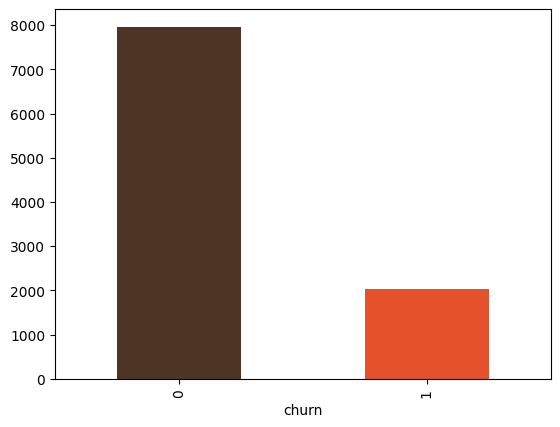

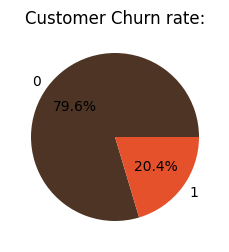

In [195]:
# Plot distribution of dependent/target variable - Churn column
df['churn'].value_counts().head().plot.bar(color=['#4D3425', '#E4512B'])   # Generate a bar plot

# Calculate sizes and labels for the pie chart
sizes = df['churn'].value_counts(sort=True)  # Get counts of churned and not churned customers
labels = np.unique(df.churn)  # Get unique labels for the pie chart slices

# Visualize the data
plt.figure(figsize=(6, 6))  # Set figure size
plt.subplot(212)  # Create subplot for pie chart
plt.title("Customer Churn rate:")  # Set title for the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#4D3425', '#E4512B'])  # Generate pie chart with percentages

# Additional comment
# Both bar and pie plots below show that the number of customers who churned is less than half of those who did not churn.

In [196]:
# Get the unique values in the 'gender' column of the DataFrame
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

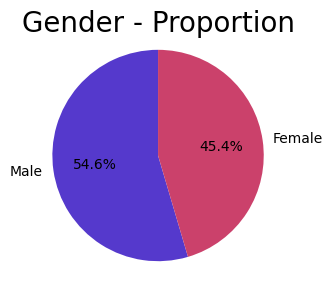

Counter({'Male': 5457, 'Female': 4543})

In [197]:
# Count the number of occurrences of each gender
gender_counts = df['gender'].value_counts()

# Labels for the pie chart
labels = gender_counts.index

# Sizes for the pie chart slices (number of occurrences)
sizes = gender_counts.values

# Colors for the pie chart slices
colors = ['#5539cc','#cb416b'] 

# Set up the figure size
plt.figure(figsize=(3, 3))

# Set the title of the pie chart
plt.title('Gender - Proportion', fontsize=20)

# Generate the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})

# Ensure the pie chart is drawn as a circle
plt.axis('equal')

# Display the pie chart
plt.show()

# Display count of each class
Counter(df.gender)

In [198]:
# Get the unique values in the 'country' column of the DataFrame
df['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

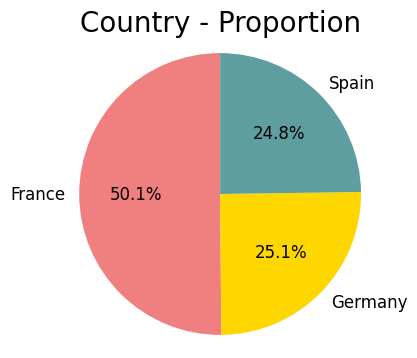

Counter({'France': 5014, 'Germany': 2509, 'Spain': 2477})

In [199]:
# Count the number of occurrences of each gender
country_counts = df['country'].value_counts()

# Labels for the pie chart
labels = country_counts.index

# Sizes for the pie chart slices (number of occurrences)
sizes = country_counts.values

# Colors for the pie chart slices
colors = ['lightcoral','gold', 'cadetblue']

# Set up the figure size
plt.figure(figsize=(4, 4))

# Set the title of the pie chart
plt.title('Country - Proportion', fontsize=20)

# Generate the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})

# Ensure the pie chart is drawn as a circle
plt.axis('equal')

# Display the pie chart
plt.show()

# Display count of each class
Counter(df.country)

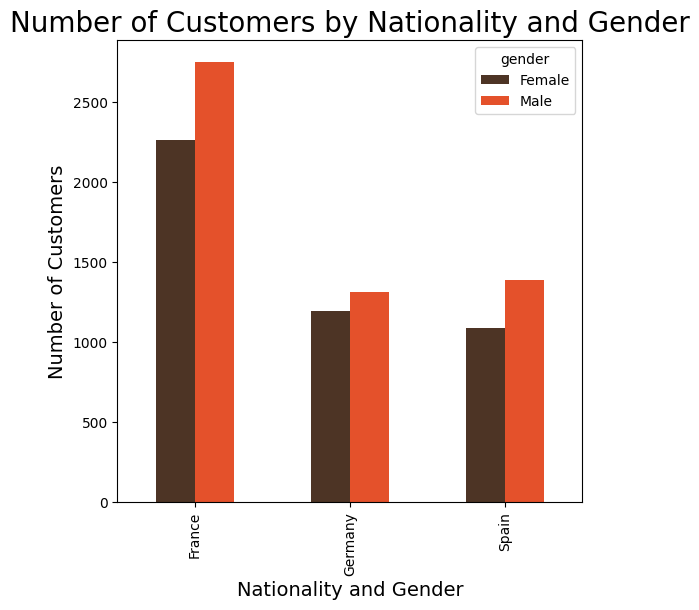

In [200]:
# Group by Nationality and Gender and count the occurrences
grouped_data = df.groupby(['country', 'gender']).size().unstack()

# Plot the bar chart
grouped_data.plot(kind='bar', figsize=(6, 6), color=['#4D3425', '#E4512B'])

# Set the title and labels
plt.title('Number of Customers by Nationality and Gender', fontsize=20)
plt.xlabel('Nationality and Gender', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)

# Display the plot
plt.show()

In [201]:
# Group the DataFrame 'df' by the 'gender' column and count occurrences of 'churn'
grouped = df.groupby('gender')['churn'].agg(Count='value_counts')

# Reorganize dataframe for plotting count
df_gc = grouped

# Pivot the table for better visualization
df_gc = df_gc.pivot_table(values='Count', index='gender', columns=['churn'])

# Display the resulting DataFrame ready for plotting
df_gc

churn,0,1
gender,,
Female,3404.0,1139.0
Male,4559.0,898.0


In [202]:
# Calculate percentage within each class
df_gp = grouped.groupby(level=[0]).apply(lambda g: round(g * 100 / g.sum(), 2))

# Rename column 'Count' to 'Percentage' for clarity
df_gp.rename(columns={'Count': 'Percentage'}, inplace=True)

# Reorganize dataframe for plotting percentage
df_gp = df_gp.pivot_table(values='Percentage', index='gender', columns=['churn'])

# Display the resulting pivot table
df_gp

churn,0,1
gender,,
Female,74.93,25.07
Male,83.54,16.46


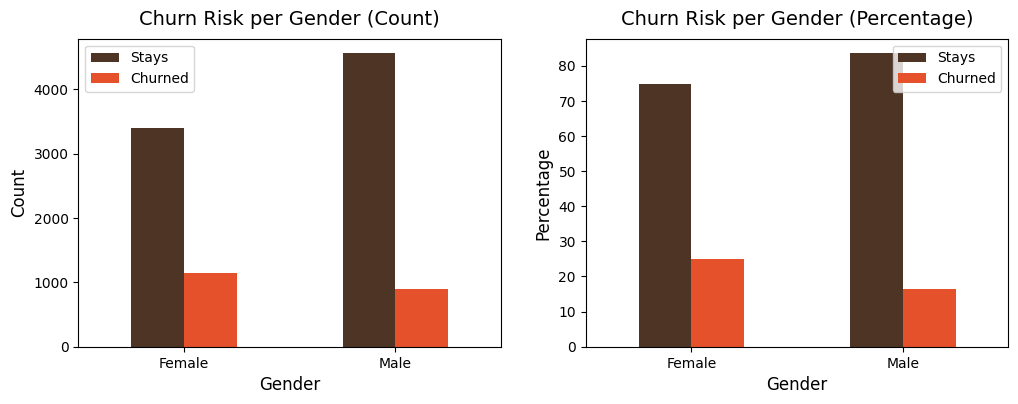

In [203]:
# Churn distribution by gender, count + percentage

# Define labels for the legend
labels = ['Stays', 'Churned']

# Create a figure with two subplots (one row, two columns), with a specific size
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot the count of 'Stays' and 'Churned' per gender in the first subplot (ax1)
df_gc.plot(kind='bar',  # Plot as a bar chart
          color=['#4D3425', '#E4512B'],  # Color blue for 'Stays' and red for 'Churned'
          rot=0,  # Do not rotate x-axis labels
          ax=ax1)  # Assign to the first subplot (ax1)
ax1.legend(labels)  # Add legend with 'Stays' and 'Churned'
ax1.set_title('Churn Risk per Gender (Count)', fontsize=14, pad=10)  # Set title
ax1.set_ylabel('Count', size=12)  # Set y-axis label
ax1.set_xlabel('Gender', size=12)  # Set x-axis label

# Plot the percentage of 'Stays' and 'Churned' per gender in the second subplot (ax2)
df_gp.plot(kind='bar',  # Plot as a bar chart
          color=['#4D3425', '#E4512B'], 
          rot=0,  # Do not rotate x-axis labels
          ax=ax2)  # Assign to the second subplot (ax2)
ax2.legend(labels)  # Add legend with 'Stays' and 'Churned'
ax2.set_title('Churn Risk per Gender (Percentage)', fontsize=14, pad=10)  # Set title
ax2.set_ylabel('Percentage', size=12)  # Set y-axis label
ax2.set_xlabel('Gender', size=12)  # Set x-axis label

# Show the plot
plt.show()

In [204]:
# Segment "churn" by country and display the frequency within each class
grouped = df.groupby('country')['churn'].agg(Count='value_counts')

# Reorganize dataframe for plotting count
df_coc = grouped

# Pivot the dataframe for better visualization
df_coc = df_coc.pivot_table(values='Count', index='country', columns=['churn'])

# Display the resulting pivot table
df_coc

churn,0,1
country,,
France,4204.0,810.0
Germany,1695.0,814.0
Spain,2064.0,413.0


In [205]:
# Calculate percentage within each class
df_cop = grouped.groupby(level=[0]).apply(lambda g: round(g * 100 / g.sum(), 2))

# Rename 'Count' column to 'Percentage' for clarity
df_cop.rename(columns={'Count': 'Percentage'}, inplace=True)

# Reorganize dataframe for plotting percentage
df_cop = df_cop.pivot_table(values='Percentage', index='country', columns=['churn'])

# Display the resulting pivot table
df_cop

churn,0,1
country,,
France,83.85,16.15
Germany,67.56,32.44
Spain,83.33,16.67


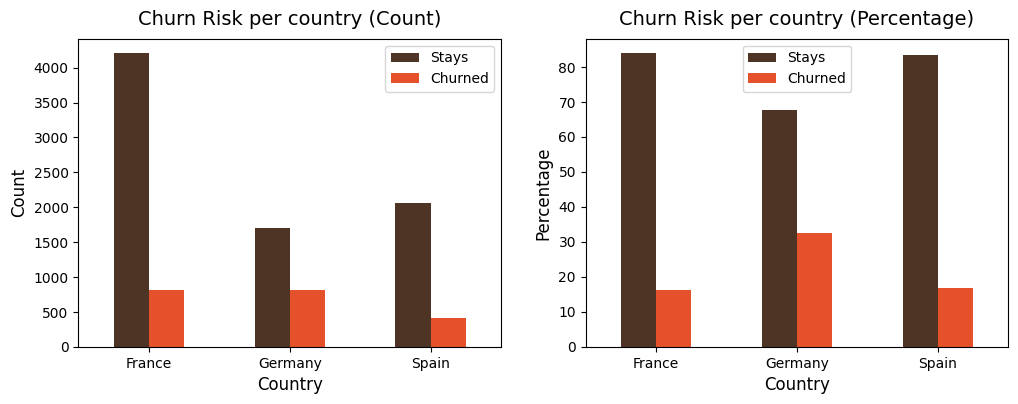

In [206]:
# Churn distribution by country, count + percentage

# Labels for legend
labels = ['Stays', 'Churned']

# Create a figure with two subplots (ax1 and ax2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plotting count of churn per country (df_coc)
df_coc.plot(kind='bar',
            color=['#4D3425', '#E4512B'],  # Custom colors for 'Stays' and 'Churned'
            rot=0,  # Rotation of x-axis labels
            ax=ax1)  # Plot on ax1
ax1.legend(labels)  # Add legend to ax1
ax1.set_title('Churn Risk per country (Count)', fontsize=14, pad=10)  # Set title for ax1
ax1.set_ylabel('Count', size=12)  # Set y-axis label for ax1
ax1.set_xlabel('Country', size=12)  # Set x-axis label for ax1

# Plotting percentage of churn per country (df_cop)
df_cop.plot(kind='bar',
            color=['#4D3425', '#E4512B'],  # Same custom colors for 'Stays' and 'Churned'
            rot=0,  # Rotation of x-axis labels
            ax=ax2)  # Plot on ax2
ax2.legend(labels)  # Add legend to ax2
ax2.set_title('Churn Risk per country (Percentage)', fontsize=14, pad=10)  # Set title for ax2
ax2.set_ylabel('Percentage', size=12)  # Set y-axis label for ax2
ax2.set_xlabel('Country', size=12)  # Set x-axis label for ax2

# Display the plot
plt.show()

In [207]:
# Convert categorical variables into dummy/indicator variables.
df = pd.get_dummies(df, drop_first=True)

# Display the first few rows of the modified DataFrame to verify the changes.
df.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


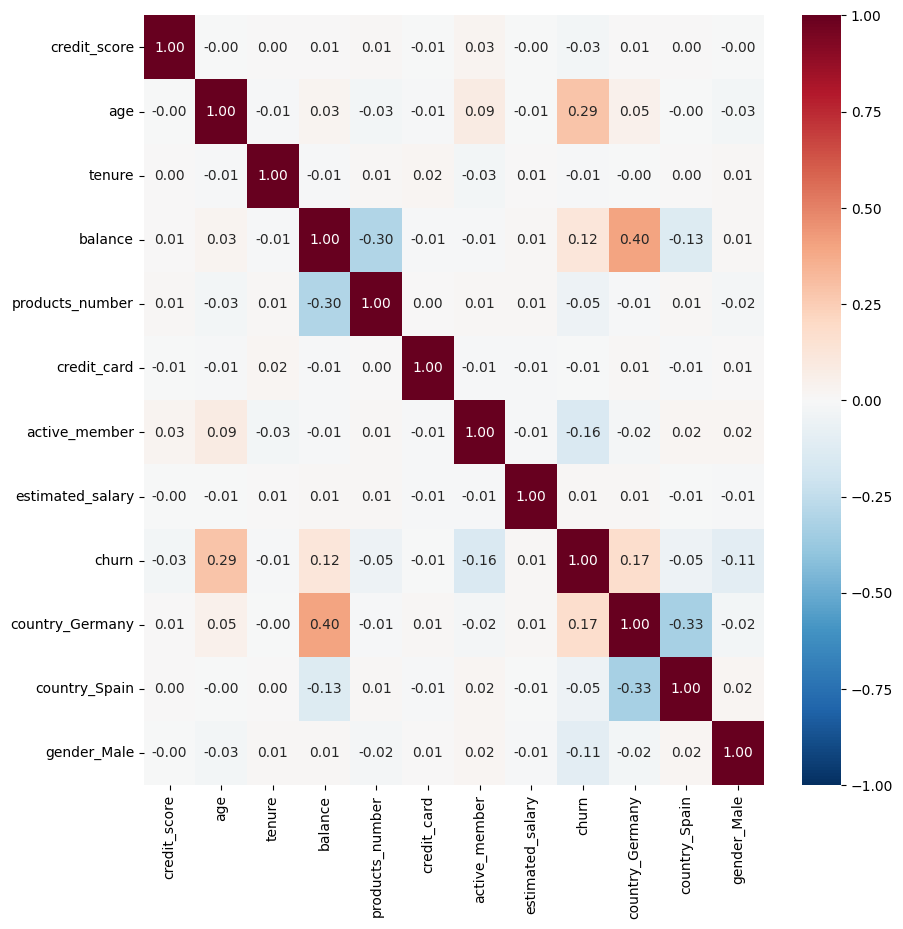

In [208]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 10))

# Create the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='RdBu_r')

# Display the plot
plt.show()

In [211]:
# Split the data into training and testing sets
X = df.drop('churn', axis=1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [212]:
# Build and train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [217]:
# Make predictions
y_pred = rf.predict(X_test)

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred)) 
print("Recall:", recall_score(y_test, y_pred))
print("f1_score:", f1_score(y_test, y_pred))

Accuracy: 0.8663333333333333
Precision: 0.7520661157024794
Recall: 0.4674657534246575
f1_score: 0.5765575501583949


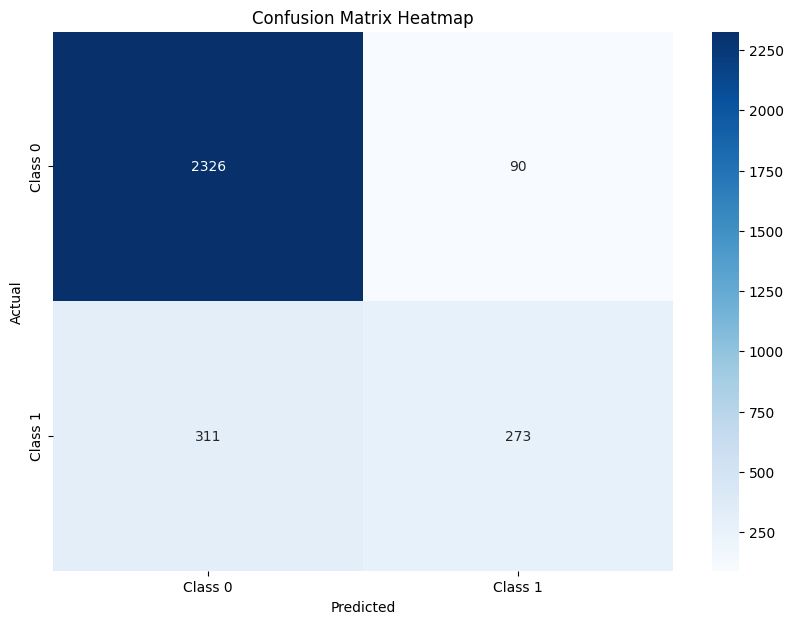

In [215]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()